# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 23.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
299482,0.3027,0.1123,0.2051,0.5151,0.0171,0.0195,0.3223,0.8105,0.1099,0.4395,10,10,6,6
336728,0.0293,0.0024,0.0024,0.0024,0.0024,0.0024,0.1270,0.4492,0.0024,0.2222,0,0,0,0
239736,0.0830,0.0024,0.0024,0.0024,0.0024,0.0024,0.2173,0.4517,0.0024,0.3271,5,0,17,0
213762,0.4248,0.1123,0.0659,0.1538,0.1123,0.3491,3.2861,2.4194,0.0366,1.9922,4,4,14,14
140597,0.1465,0.7788,1.0913,0.0684,0.0757,0.1392,0.7056,2.1704,0.2246,1.9287,7,7,5,5


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466726 entries, 0 to 466725
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          466726 non-null  float64
 1   Emg2          466726 non-null  float64
 2   Emg3          466726 non-null  float64
 3   Emg4          466726 non-null  float64
 4   Emg5          466726 non-null  float64
 5   Emg6          466726 non-null  float64
 6   Emg7          466726 non-null  float64
 7   Emg8          466726 non-null  float64
 8   Emg9          466726 non-null  float64
 9   Emg10         466726 non-null  float64
 10  repetition    466726 non-null  int64  
 11  rerepetition  466726 non-null  int64  
 12  stimulus      466726 non-null  int64  
 13  restimulus    466726 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.9 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000,466726.000000
mean,0.251095,0.119320,0.115496,0.045759,0.016772,0.032003,0.398193,0.522112,0.103482,0.369998,3.170173,2.415398,5.640063,4.377206
std,0.404683,0.272062,0.290616,0.163999,0.047524,0.075457,0.559503,0.600535,0.374202,0.436304,3.483223,3.321240,6.584233,6.346566
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043900,0.002400,0.002400,0.002400,0.002400,0.002400,0.065900,0.114700,0.002400,0.058600,0.000000,0.000000,0.000000,0.000000
50%,0.107400,0.019500,0.002400,0.002400,0.002400,0.002400,0.217300,0.390600,0.002400,0.251500,2.000000,0.000000,3.000000,0.000000
75%,0.268600,0.124500,0.102500,0.004900,0.002400,0.029300,0.490700,0.683600,0.043900,0.490700,6.000000,5.000000,10.000000,8.000000
max,4.665500,4.665500,4.658200,4.111300,1.279300,1.865200,4.663100,4.665500,4.663100,4.663100,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     197016
12     15538
8      15534
2      15533
4      15528
11     15528
9      15521
7      15514
6      15507
5      15506
3      15485
1      15470
10     15463
13     11255
17     10362
14     10343
15     10330
16     10316
18      5173
19      5173
21      5170
20      5154
23      5154
22      5153
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.589160,-0.446429,-0.415983,-0.288917,-0.332611,-0.386068,-0.206501,-0.439201,-0.29176,-0.014451
1,-0.577867,-0.446429,-0.415983,-0.288917,-0.332611,-0.416621,-0.222716,-0.412421,-0.29176,-0.025005
2,-0.572336,-0.446429,-0.415983,-0.288917,-0.332611,-0.416621,-0.271697,-0.393314,-0.29176,-0.067004
3,-0.577867,-0.446429,-0.415983,-0.288917,-0.332611,-0.416621,-0.279888,-0.397229,-0.29176,-0.130110
4,-0.589160,-0.446429,-0.415983,-0.288917,-0.332611,-0.416621,-0.275876,-0.400988,-0.29176,-0.198601
...,...,...,...,...,...,...,...,...,...,...
385281,-0.285422,-0.305038,-0.415983,-0.288917,-0.332611,-0.326183,0.238337,-0.374207,-0.29176,-0.067004
385282,-0.324830,-0.329909,-0.415983,-0.288917,-0.332611,-0.356736,0.168962,-0.385640,-0.29176,-0.082942
385283,-0.364237,-0.354781,-0.415983,-0.288917,-0.332611,-0.416621,0.217942,-0.381881,-0.29176,-0.077557
385284,-0.364237,-0.396346,-0.415983,-0.288917,-0.332611,-0.416621,0.222121,-0.378122,-0.29176,-0.051281


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
76/76 [==============================] - 3s 28ms/step - loss: 1.5451 - accuracy: 0.6044 - val_loss: 1.1859 - val_accuracy: 0.6874
Epoch 2/100
76/76 [==============================] - 2s 27ms/step - loss: 1.0649 - accuracy: 0.7094 - val_loss: 0.9665 - val_accuracy: 0.7331
Epoch 3/100
76/76 [==============================] - 2s 26ms/step - loss: 0.9266 - accuracy: 0.7423 - val_loss: 0.8640 - val_accuracy: 0.7601
Epoch 4/100
76/76 [==============================] - 2s 26ms/step - loss: 0.8596 - accuracy: 0.7587 - val_loss: 0.8247 - val_accuracy: 0.7690
Epoch 5/100
76/76 [==============================] - 2s 25ms/step - loss: 0.7988 - accuracy: 0.7731 - val_loss: 0.7764 - val_accuracy: 0.7820
Epoch 6/100
76/76 [==============================] - 2s 25ms/step - loss: 0.7613 - accuracy: 0.7824 - val_loss: 0.7359 - val_accuracy: 0.7916
Epoch 7/100
76/76 [==============================] - 2s 25ms/step - loss: 0.7250 - accuracy: 0.7916 - val_loss: 0.6962 - val_accuracy: 0.8004
Epoch 

76/76 [==============================] - 2s 26ms/step - loss: 0.3198 - accuracy: 0.9016 - val_loss: 0.3612 - val_accuracy: 0.8918
Epoch 59/100
76/76 [==============================] - 2s 27ms/step - loss: 0.3085 - accuracy: 0.9047 - val_loss: 0.3539 - val_accuracy: 0.8941
Epoch 60/100
76/76 [==============================] - 2s 26ms/step - loss: 0.3086 - accuracy: 0.9047 - val_loss: 0.3640 - val_accuracy: 0.8911
Epoch 61/100
76/76 [==============================] - 2s 26ms/step - loss: 0.3044 - accuracy: 0.9062 - val_loss: 0.3545 - val_accuracy: 0.8945
Epoch 62/100
76/76 [==============================] - 2s 26ms/step - loss: 0.3010 - accuracy: 0.9068 - val_loss: 0.3492 - val_accuracy: 0.8958
Epoch 63/100
76/76 [==============================] - 2s 26ms/step - loss: 0.3015 - accuracy: 0.9069 - val_loss: 0.3609 - val_accuracy: 0.8920
Epoch 64/100
76/76 [==============================] - 2s 26ms/step - loss: 0.3000 - accuracy: 0.9068 - val_loss: 0.3512 - val_accuracy: 0.8946
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

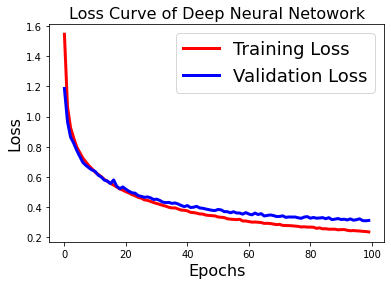

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

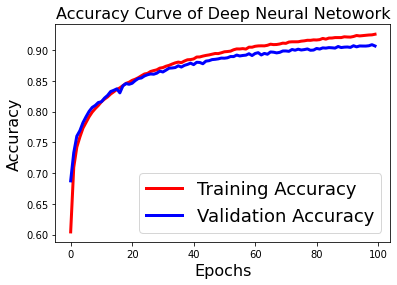

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([ 6, 11,  0, ..., 14,  0, 12], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

11

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 90.66417503698513


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94     37786
           1       0.92      0.92      0.92      2271
           2       0.93      0.90      0.91      2387
           3       0.97      0.89      0.93      2253
           4       0.95      0.93      0.94      2236
           5       0.96      0.93      0.95      2181
           6       0.95      0.97      0.96      2183
           7       0.93      0.88      0.91      2103
           8       0.92      0.86      0.89      2448
           9       0.88      0.80      0.84      2381
          10       0.87      0.75      0.81      2093
          11       0.84      0.80      0.82      2252
          12       0.94      0.83      0.88      2139
          13       0.70      0.80      0.75      1593
          14       0.76      0.68      0.72      1504
          15       0.80      0.75      0.77      1544
          16       0.85      0.86      0.86      1513
 

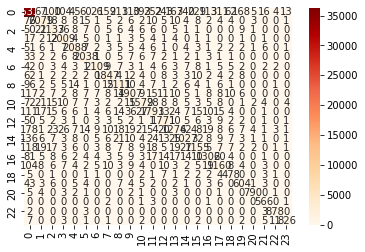

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8744971320304187
MSE: 10.86429702302162
RMSE: 3.2961033089121496


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.906547975703446
Recall Score :  0.9066417503698513
f1_score :  0.9055775712479209
